In [29]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [6]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [7]:
titles = pd.DataFrame.from_csv('data/titles.csv', index_col=None)
titles.head()

,title,year
0,The Rising Son,1990
1,The Thousand Plane Raid,1969
2,Crucea de piatra,1993
3,Country,2000
4,Gaiking II,2011


In [8]:
cast = pd.DataFrame.from_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,NaN
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


### What are the ten most common movie names of all time?

In [9]:
titles.title.value_counts().head(10)

Hamlet                  18
Carmen                  16
Macbeth                 15
The Outsider            12
Kismet                  11
Maya                    11
Temptation              11
Othello                 11
Freedom                 11
The Three Musketeers    11
Name: title, dtype: int64

### Which three years of the 1930s saw the most films released?

In [10]:
titles.year[titles.year // 10 == 193].value_counts().head(3)

1937    1194
1936    1139
1938    1127
Name: year, dtype: int64

### Plot the number of films that have been released each decade over the history of cinema.

In [11]:

(titles.year // 10 * 10).value_counts().sort_index().plot(kind='bar')

### Plot the number of "Hamlet" films made each decade.

In [12]:
t = titles[titles.title == "Hamlet"]
(t.year // 10 * 10).value_counts().sort_index().plot(kind='bar')

### Plot the number of "Rustler" characters in each decade of the history of film.

In [13]:
t=cast[cast.character == "Rustler"]
(t.year // 10 * 10).value_counts().sort_index().plot()

### Plot the number of "Hamlet" characters each decade.

In [14]:
t=cast[cast.character == "Hamlet"]
(t.year // 10 * 10).value_counts().sort_index().plot()

### What are the 11 most common character names in movie history?

In [15]:
cast.character.value_counts().head(11)

Himself        19486
Dancer         11995
Extra          10887
Reporter        8127
Doctor          7402
Student         7146
Policeman       6855
Party Guest     6718
Nurse           6637
Bartender       6583
Minor Role      6219
Name: character, dtype: int64

### Who are the 10 people most often credited as "Herself" in film history?

In [16]:
cast.name[cast.character == "Herself"].value_counts().head(10)

Queen Elizabeth II    11
Joyce Brothers         9
Margaret Thatcher      7
Mary Jo Pehl           7
Joan Rivers            6
Hillary Clinton        6
Caroline Rhea          5
Bunny Yeager           5
Rekha                  5
Marilyn Monroe         5
Name: name, dtype: int64

### Who are the 10 people most often credited as "Himself" in film history?

In [17]:
cast.name[cast.character == "Himself"].value_counts().head(10)

Adolf Hitler          99
Richard Nixon         45
Ronald Reagan         39
John F. Kennedy       33
Ron Jeremy            23
George W. Bush        23
Winston Churchill     23
Benito Mussolini      22
Martin Luther King    20
Bill Clinton          20
Name: name, dtype: int64

### Which actors or actresses appeared in the most movies in the year 1945?

In [18]:
cast.name[cast.year == 1945].value_counts().head(10)

Emmett Vogan       39
Sam (II) Harris    32
Bess Flowers       29
Harold Miller      29
Frank O'Connor     27
Nolan Leary        27
Franklyn Farnum    26
Larry Steers       25
Tom London         24
Herman Hack        24
Name: name, dtype: int64

### Which actors or actresses appeared in the most movies in the year 1985?

In [19]:
cast.name[cast.year == 1985].value_counts().head(10)

Mammootty        21
Shakti Kapoor    21
Sukumari         19
Mohanlal         15
Raj Babbar       15
Lou Scheimer     15
Aruna Irani      15
Rajesh Khanna    13
Asrani           13
Deven Verma      13
Name: name, dtype: int64

### Plot how many roles Mammootty has played in each year of his career.

In [20]:
c = cast[cast.name == 'Mammootty']
(c.year // 10 *10).value_counts().sort_index().plot(kind='bar')

### What are the 10 most frequent roles that start with the phrase "Patron in"?

In [21]:
cast.character[cast.character.str.startswith('Patron in')].value_counts().head(10)

Patron in Frisky Rabbit         16
Patron in the Coffee House       9
Patron in Chinese Restaurant     9
Patron in Billiard Parlor        5
Patron in Bar                    4
Patron in restaurant             4
Patron in cabaret                3
Patron in Club                   3
Patron in Restaurant             3
Patron in Audience               2
Name: character, dtype: int64

### What are the 10 most frequent roles that start with the word "Science"?

In [22]:
cast.character[cast.character.str.startswith('Science')].value_counts().head(10)

Science Teacher         60
Science Fair Student     9
Science Student          9
Science Fair Judge       6
Science Kid              6
Science Promo Cadet      5
Science Reporter         5
Science Club Member      5
Science                  4
Science Officer          3
Name: character, dtype: int64

### Plot the n-values of the roles that Judi Dench has played over her career.

In [23]:
cast[cast.name == 'Judi Dench'].plot(x='year', y='n', kind='scatter')

### Plot the n-values of Cary Grant's roles through his career.

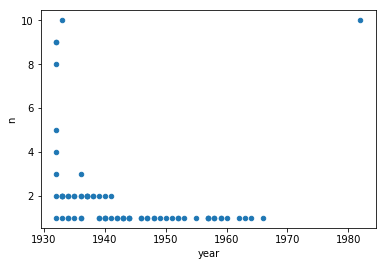

In [31]:
cast[cast.name == 'Cary Grant'].plot(x='year', y='n', kind='scatter')

### Plot the n-value of the roles that Sidney Poitier has acted over the years.

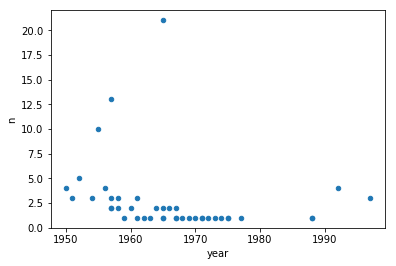

In [30]:
cast[cast.name == 'Sidney Poitier'].plot(x='year', y='n', kind='scatter')

### How many leading (n=1) roles were available to actors, and how many to actresses, in the 1950s?

In [37]:
len(cast[(cast.n==1) & (cast.year //10 == 195) & (cast.type == 'actor')])

6599

In [36]:
len(cast[(cast.n==1) & (cast.year //10 == 195) & (cast.type == 'actress')])

2953

### How many supporting (n=2) roles were available to actors, and how many to actresses, in the 1950s?

In [39]:
len(cast[(cast.n == 2) & (cast.year // 10 == 195) & (cast.type == 'actor')])

4550

In [42]:
len(cast[(cast.n == 2) & (cast.year // 10 == 195) & (cast.type == 'actress')])

4544